In [1]:
# first some necessary python imports
import numpy as np
import mpmath as mp # its part of sympy, offers high-precition floating-point arithmetic
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('..')
from models import WilkensLET

## Comparison with digitized plots from the Wilkens' article

Figure 4 and 5:

 - Energy: 70 MeV
 - Energy spread: 0.0, 0.5 and 2.0 MeV
 - dLET and tLET

In [3]:
digitized = {
     't' :
     {
         0.0 : np.loadtxt("70_0.0_Lt.csv", delimiter=", "),
         0.5 : np.loadtxt("70_0.5_Lt.csv", delimiter=", "),
         2.0 : np.loadtxt("70_2.0_Lt.csv", delimiter=", "),
     },
    'd' :
    {
        0.0 : np.loadtxt("70_0.0_Ld.csv", delimiter=", "),
        0.5 : np.loadtxt("70_0.5_Ld.csv", delimiter=", "),
        2.0 : np.loadtxt("70_2.0_Ld.csv", delimiter=", "),
    },
}

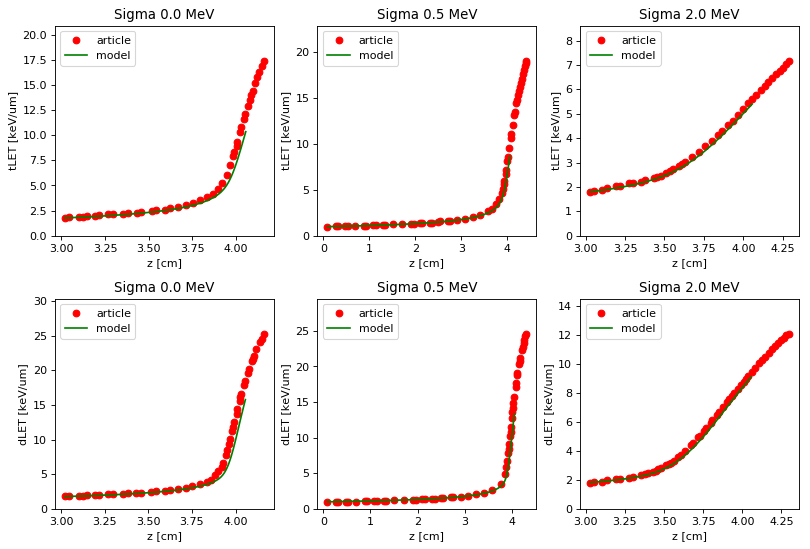

In [4]:
E_MeV = 70
f, axarr = plt.subplots(2, 3, figsize=(12, 8), dpi=80)
plt.subplots_adjust(hspace = .3)
for i, ave in enumerate(digitized.keys()):
    for j, sigma in enumerate(digitized[ave].keys()):
        data = digitized[ave][sigma]
        z_cm = np.linspace(data[:,0].min(), data[:,0].max(), 500)
        if ave == 't':
            let_keV_um = WilkensLET.let_t_keV_um(E_MeV, sigma, z_cm)
        else:
            let_keV_um = WilkensLET.let_d_keV_um(E_MeV, sigma, z_cm)
        axarr[i, j].set_title('Sigma {:1.1f} MeV'.format(sigma))
        axarr[i, j].set_xlabel('z [cm]')
        axarr[i, j].set_ylabel('{:s}LET [keV/um]'.format(ave))
        axarr[i, j].set_ylim(0, 1.2*data[:,1].max())
        axarr[i, j].plot(data[:,0], data[:,1], 'ro', label="article")
        axarr[i, j].plot(z_cm, let_keV_um, 'g-', label="model")
        axarr[i, j].legend(loc=0)


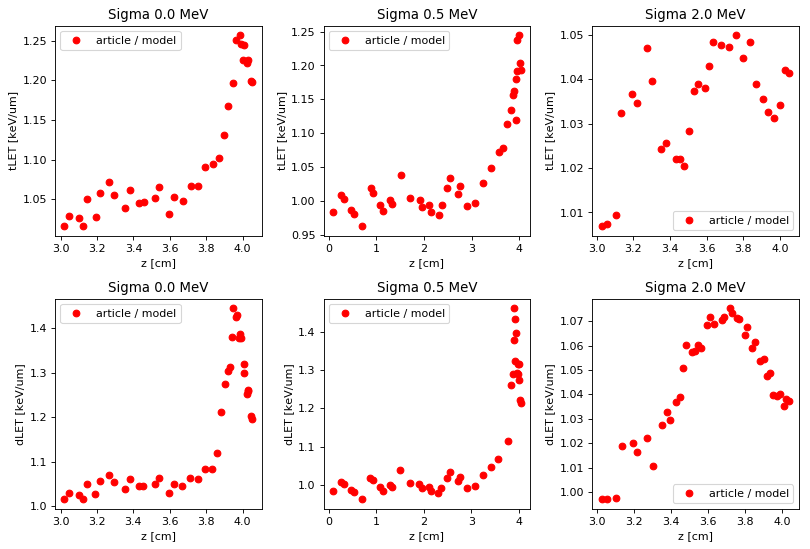

In [5]:
E_MeV = 70
f, axarr = plt.subplots(2, 3, figsize=(12, 8), dpi=80)
plt.subplots_adjust(hspace = .3)
plt.subplots_adjust(wspace = .3)
for i, ave in enumerate(digitized.keys()):
    for j, sigma in enumerate(digitized[ave].keys()):
        data = digitized[ave][sigma]
        if ave == 't':
            let_keV_um = WilkensLET.let_t_keV_um(E_MeV, sigma, data[:,0])
        else:
            let_keV_um = WilkensLET.let_d_keV_um(E_MeV, sigma, data[:,0])
        axarr[i, j].set_title('Sigma {:1.1f} MeV'.format(sigma))
        axarr[i, j].set_xlabel('z [cm]')
        axarr[i, j].set_ylabel('{:s}LET [keV/um]'.format(ave))
        axarr[i, j].plot(data[:,0], data[:,1] / let_keV_um, 'ro', label="article / model")
        axarr[i, j].legend(loc=0)
